# Decision Trees Lab

### Intro and objectives


### In this lab you will learn:
1. A basic example of a Decision Tree based Classifier

## What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### In this lab we will use the iris dataset. In this dataset there are three different classes of flowers: setosa, versicolor and virginica

#### We only use two features for classification: petal lenght and petal width


In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)


In [5]:
type(iris)

sklearn.utils._bunch.Bunch

In [6]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [10]:
X_iris[0:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [11]:
y_iris[0:10]

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.10, random_state=42)

## 1. Model training

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## 2. Model visualization

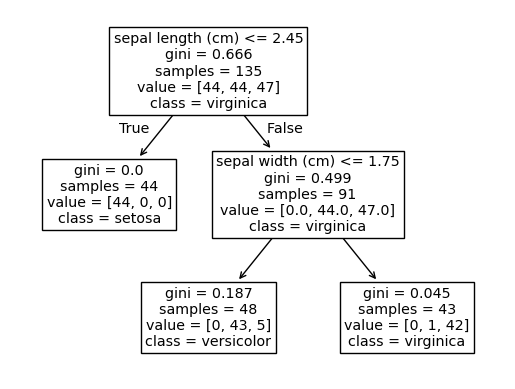

In [14]:
from sklearn import tree
tree.plot_tree(tree_clf,feature_names=iris.feature_names,class_names=iris.target_names);

#### Let’s see how the tree represented in the previous figure makes predictions. Suppose you find an iris flower and you want to classify it based on its petals. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left).

#### In this case, it is a leaf node (i.e., it does not have any child nodes), so it does not ask any questions: simply look at the predicted class for that node, and the decision tree predicts that your flower is an Iris setosa (class=setosa).

#### Now suppose you find another flower, and this time the petal length is greater than 2.45 cm. You again start at the root but now move down to its right child node (depth 1, right). This is not a leaf node, it’s a split node, so it asks another question: is the petal width smaller than 1.75 cm? If it is, then your flower is most likely an Iris versicolor (depth 2, left). If not, it is likely an Iris virginica (depth 2, right).

## 3. Model Prediction

#### As usual, once we have trained our classifier we can use it to predict the class a specific instance belongs to.

In [15]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.896, 0.104]])

In [16]:
tree_clf.predict_proba([[3, 2.5]]).round(3)

array([[0.   , 0.023, 0.977]])

## 4. Model Performance Evaluation


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [18]:


y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)




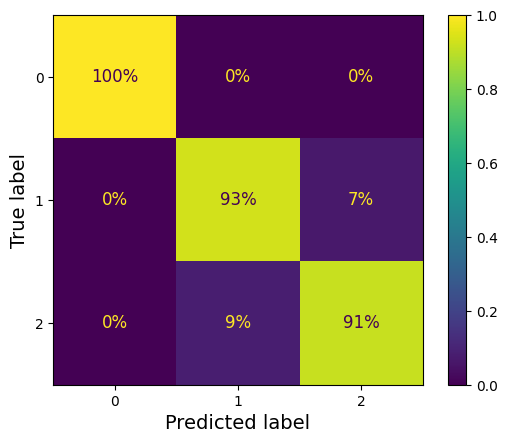

In [19]:
plt.rc('font', size=12)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

### Based on the previous result we observe that a decision forest based classifier does a good job with the iris dataset.

#### It performs really well in the case of the first class (setosa), not so well in the case of the third class (virginica).

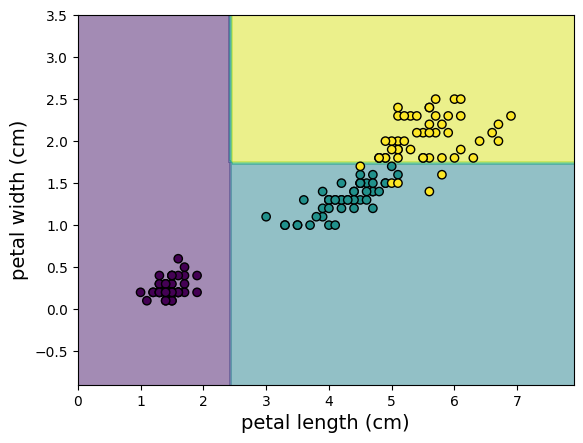

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(tree_clf, X_iris, response_method="predict",xlabel='petal length (cm)', ylabel='petal width (cm)',alpha=0.5)
disp.ax_.scatter(X_iris[:, 0], X_iris[:, 1], c=iris.target, edgecolor="k")
plt.show()

#### The previous figure confirms the limitations of the classifier as far as the third class (viriginica, in yellow color) is concerned

## 5. Model Improvement

#### There are several avenues we can follow to improve the previous classifier, we can increase the number of samples we use to train the system. We can also add more features as well as change some parameters of the classifier

### 5.1. Additional features and hyperparameter tuning

In [21]:
X_iris = iris.data.values
y_iris = iris.target

In [22]:
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
y_train

,target
56,1
104,2
69,1
55,1
132,2
...,...
71,1
106,2
14,0
92,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.01, random_state=42)

In [25]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

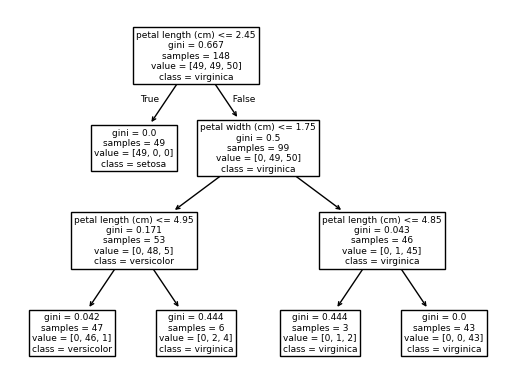

In [26]:
from sklearn import tree
tree.plot_tree(tree_clf2,feature_names=iris.feature_names,class_names=iris.target_names);

In [27]:
y_train_pred = cross_val_predict(tree_clf2, X_train, y_train, cv=3)

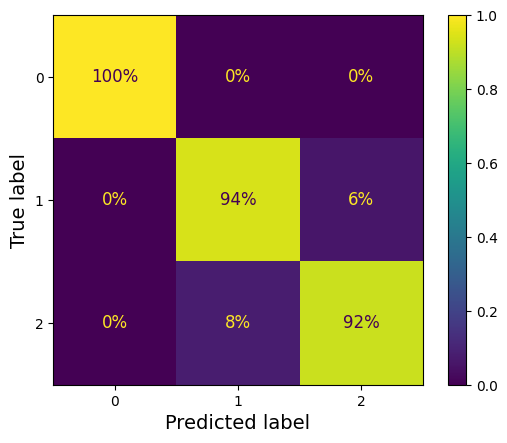

In [28]:
plt.rc('font', size=12)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

#### Based on the confusion matrix we conclude that this second classifier outperforms the first one.